In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
data = pd.read_csv(url, names=names)


In [5]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


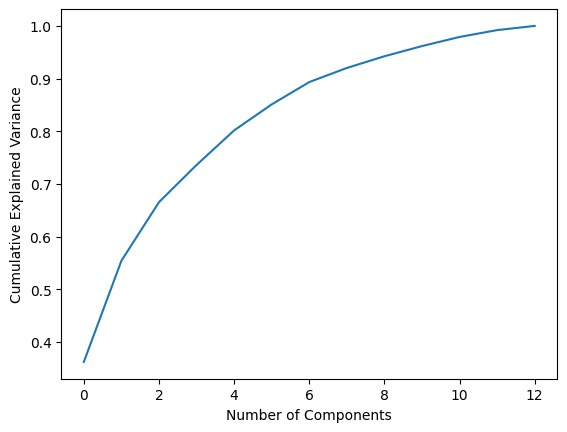

In [8]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
plt.plot(cumulative_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


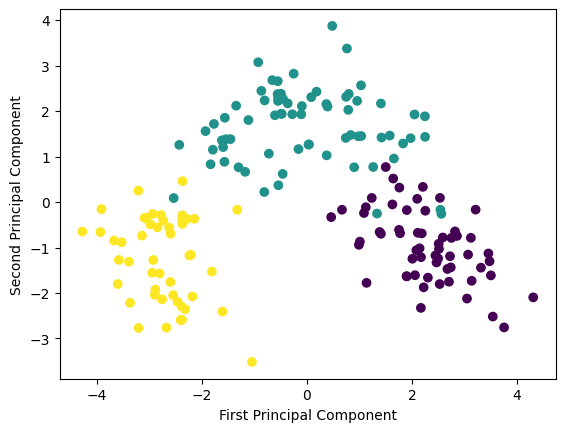

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)


c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

silhouette = silhouette_score(X_pca, y_pred)
rand_index = adjusted_rand_score(y, y_pred)

print("Silhouette Score: {:.2f}".format(silhouette))
print("Adjusted Rand Index: {:.2f}".format(rand_index))


Silhouette Score: 0.28
Adjusted Rand Index: 0.90
